<a href="https://colab.research.google.com/github/Yolan00/CL-Bernardi/blob/main/CL_Project_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files  # Library used to upload files.

uploaded = files.upload()  # Upload PINOCCHIO.zip

!unzip PINOCCHIO.zip
!mkdir RESULTS

Saving PINOCCHIO.zip to PINOCCHIO.zip
Archive:  PINOCCHIO.zip
   creating: PINOCCHIO/
  inflating: PINOCCHIO/campano_pinocchio.txt  
  inflating: PINOCCHIO/Franco_provenzale_pinocchio.txt  
  inflating: PINOCCHIO/Friulano_Pinocchio.txt  
  inflating: PINOCCHIO/Laziale_pinocchio.txt  
  inflating: PINOCCHIO/Ligure_pinocchio.txt  
  inflating: PINOCCHIO/piemontese_pinocchio.txt  
  inflating: PINOCCHIO/pinocchio_originale.txt  
  inflating: PINOCCHIO/puglia_pinocchio.txt  
  inflating: PINOCCHIO/sardo_pinocchio.txt  
  inflating: PINOCCHIO/siciliano_pinocchio.txt  
  inflating: PINOCCHIO/Toscano_Carrara_pinocchio.txt  
  inflating: PINOCCHIO/Veneto_pinocchio.txt  


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 1.3 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.10k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/723 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/402 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

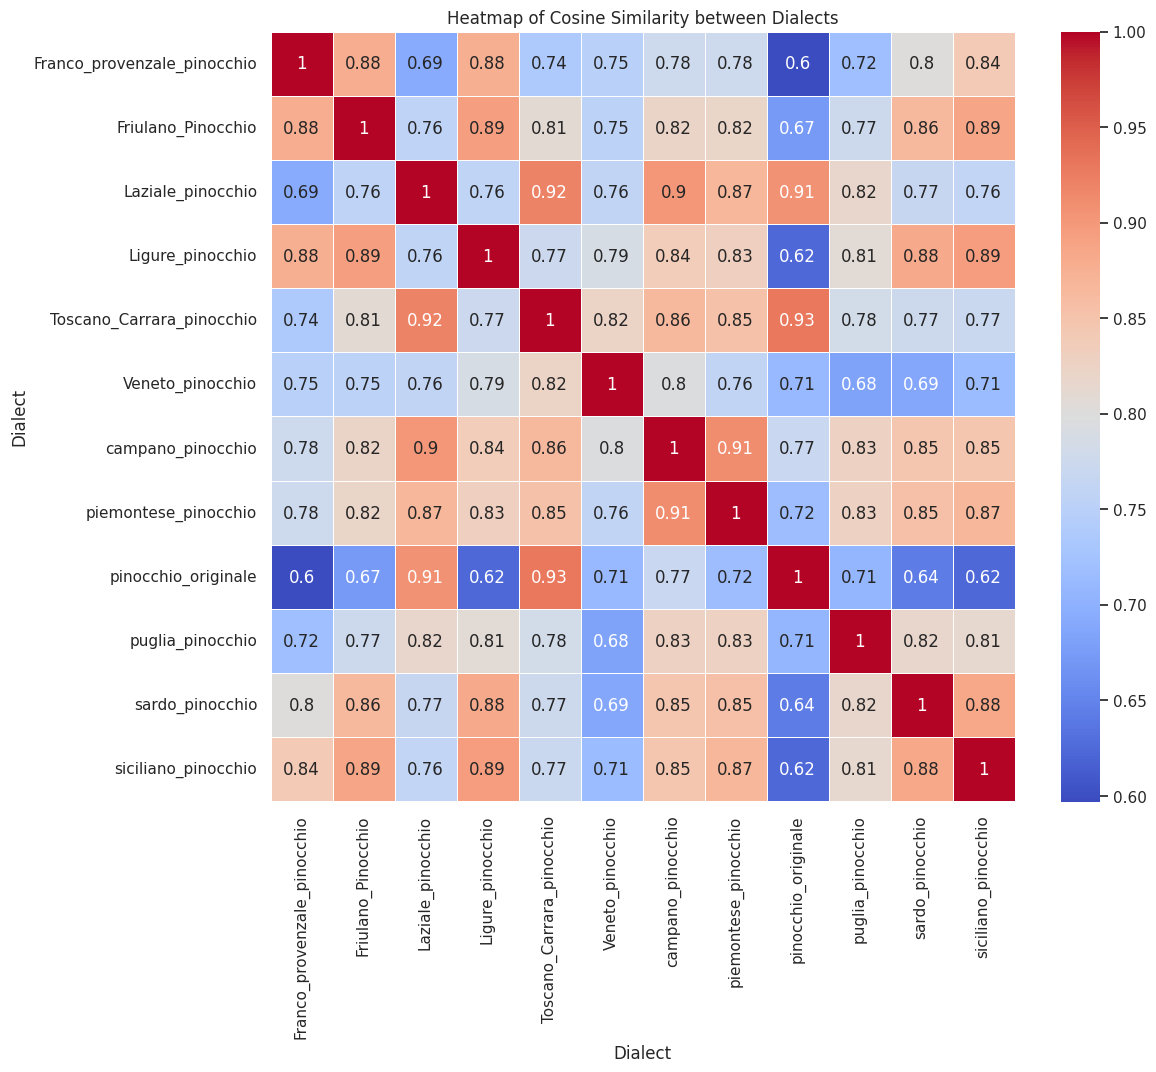

In [2]:
# Install necessary libraries
%pip install sentence-transformers geopy geopandas matplotlib seaborn

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from sentence_transformers import SentenceTransformer
from scipy.spatial.distance import cosine

# Load a pre-trained model from the Sentence Transformers library.
def load_model(model_name):
    # Instantiates and returns a SentenceTransformer model given a model name.
    return SentenceTransformer(model_name)

# Get the embedding of a the texts using a the model.
def get_text_embedding(text, model):
    # Uses the model to encode the text into a high-dimensional vector (embedding).
    return model.encode(text)

# Function to calculate the cosine similarity between two embeddings.
def cosine_similarity(embedding1, embedding2):
    # Returns the cosine similarity as 1 minus the cosine distance between two vectors.
    return 1 - cosine(embedding1, embedding2)

# Read the content of a file given its path.
def read_file(file_path):
    # Tries to open and read the file using UTF-8 encoding.
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            return file.read()
    # If a UnicodeDecodeError occurs, it tries to read the file using Latin-1 encoding.
    except UnicodeDecodeError:
        with open(file_path, 'r', encoding='latin1') as file:
            return file.read()

# Load the model
model_name = 'paraphrase-multilingual-mpnet-base-v2'
model = load_model(model_name)

# File paths
file_paths = ['/content/PINOCCHIO/Franco_provenzale_pinocchio.txt',
              '/content/PINOCCHIO/Friulano_Pinocchio.txt',
              '/content/PINOCCHIO/Laziale_pinocchio.txt',
              '/content/PINOCCHIO/Ligure_pinocchio.txt',
              '/content/PINOCCHIO/Toscano_Carrara_pinocchio.txt',
              '/content/PINOCCHIO/Veneto_pinocchio.txt',
              '/content/PINOCCHIO/campano_pinocchio.txt',
              '/content/PINOCCHIO/piemontese_pinocchio.txt',
              '/content/PINOCCHIO/pinocchio_originale.txt',
              '/content/PINOCCHIO/puglia_pinocchio.txt',
              '/content/PINOCCHIO/sardo_pinocchio.txt',
              '/content/PINOCCHIO/siciliano_pinocchio.txt'
]

# Calculates embeddings for each file's content and stores them in a list.
embeddings = [get_text_embedding(read_file(fp), model) for fp in file_paths]
# Extracts file names from the file paths to use as labels.
file_names = [os.path.basename(fp).split('.')[0] for fp in file_paths]
# Calculates a similarity matrix between all pairs of file embeddings.
similarity_matrix = np.array([[cosine_similarity(embeddings[i], embeddings[j]) if i != j else 1 for j in range(len(embeddings))] for i in range(len(embeddings))])



#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Path to the RESULTS folder
results_folder = '/content/RESULTS'

# Specify the file name for the heatmap image
heatmap_filename = os.path.join(results_folder, 'heatmap_of_cosine_similarity.png')

# Create and display a heatmap
sns.set(style="white")
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', linewidths=.5, xticklabels=file_names, yticklabels=file_names)
plt.title('Heatmap of Cosine Similarity between Dialects')
plt.xlabel('Dialect')
plt.ylabel('Dialect')
plt.savefig(heatmap_filename, bbox_inches='tight')
plt.show()




In [3]:
# Geographical coordinates for each dialect location (approximately)
dialect_locations = {
    'campano': (40.8518, 14.2681),  # Naples for Campano
    'franco provenzale': (45.733333, 7.333333),  # Aosta for Franco-Provençal
    'friulano': (46.0667, 13.2400),  # Udine for Friulano
    'laziale': (41.8928, 12.4839),  # Rome for Laziale
    'ligure': (44.4092, 8.9339),  # Genoa for Ligure
    'piemontese': (45.0703, 7.6869),  # Turin for Piemontese
    'italiano base': (43.7696, 11.2558),  # Florence for Standard Italian
    'pugliese': (40.7928, 17.1012),  # Bari for Pugliese
    'sardo': (40.1209, 9.0129),  # Nuoro for Sardo
    'siciliano': (37.6000, 14.0154),  # Central Sicily for Siciliano
    'toscano di carrara': (44.0793, 10.0977),  # Carrara for Toscano di Carrara
    'veneto': (45.4384, 12.3271)  # Venice for Veneto
}

from geopy.distance import great_circle
import numpy as np

# Initialize an empty matrix for geographical distances
geo_distances = np.zeros((len(dialect_locations), len(dialect_locations)))
dialects = list(dialect_locations.keys())

# Calculate distances
for i, loc1 in enumerate(dialects):
    for j, loc2 in enumerate(dialects):
        if i != j:
            distance = great_circle(dialect_locations[loc1], dialect_locations[loc2]).kilometers
        else:
            distance = 0
        geo_distances[i, j] = distance

from scipy.stats import pearsonr

# Flatten the upper triangular part of the matrices, excluding the diagonal
# Done to avoid redundancy and exclude self-comparison
mask = np.triu(np.ones_like(geo_distances, dtype=bool), k=1)
flat_geo_distances = geo_distances[mask]
flat_semantic_similarities = similarity_matrix[mask]

# Calculate Pearson correlation coefficient
correlation_coefficient, p_value = pearsonr(flat_semantic_similarities, flat_geo_distances)

print(f"Correlation coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

Correlation coefficient: -0.0697
P-value: 0.5782


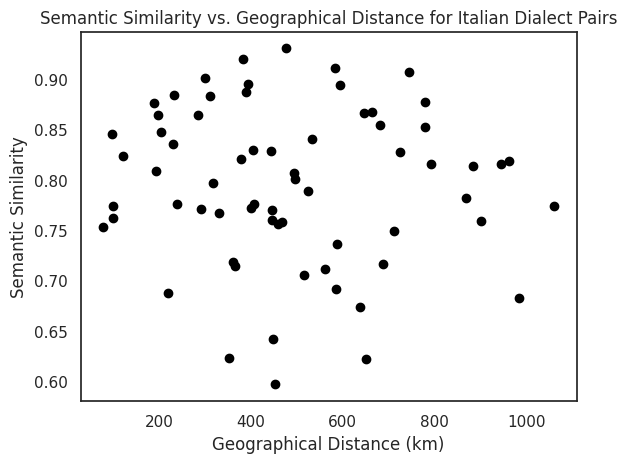

In [5]:
import matplotlib.pyplot as plt

# Specify the file name for the graph image
graph_filename = os.path.join(results_folder, 'Semantic Similarity vs. Geographical Distance for Italian Dialect Pairs.png')

# Iterate over pairs of dialects and plot their semantic similarity vs. geographical distance
for i, dialect1 in enumerate(dialects):
    for j, dialect2 in enumerate(dialects):
        if i < j:  # To avoid repeating pairs and comparing dialects with themselves
            plt.scatter(geo_distances[i, j], similarity_matrix[i, j], color='black')

# Label the axes
plt.xlabel('Geographical Distance (km)')
plt.ylabel('Semantic Similarity')
plt.title('Semantic Similarity vs. Geographical Distance for Italian Dialect Pairs')
plt.savefig(graph_filename, bbox_inches='tight')
plt.show()
